In [ ]:
# imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Generate square
def add_square(img, center, width):
  start_point = (center[0]-width, center[1]-width)
  end_point   = (center[0]+width, center[1]+width)
  cv2.rectangle(img, start_point, end_point, (255, 255, 255),cv2.FILLED)

In [ ]:
# generate sample
def create_data_sample(num_shapes, height, width):
  img = np.zeros((height, width, 3))
  for i in range(num_shapes):
    x = int(np.random.rand()*width)
    y = int(np.random.rand()*height)
    if np.random.rand() > 0.5:
      cv2.circle(img, (x,y), int(np.ceil(width*0.05)), (255, 255, 255), cv2.FILLED)
      data_shape = 0
      # Show circle pos
      # cv2.circle(label, (x,y), int(np.ceil(width*0.02)), (1, 1, 1), cv2.FILLED)
    else:
      data_shape = 1
      add_square(img, (x,y), int(np.ceil(width*0.05*0.7)))
  return img, data_shape


In [ ]:
# def test_batch(num_shapes, height, width):
#   img, data_shape = create_data_sample(num_shapes, height, width)
#   return np.expand_dims(img,0), data_shape

In [ ]:
# def grayscale_image(img):
#   return np.expand_dims((img[:,:,0] + img[:,:,1] + img[:,:,2])/3,2)

In [ ]:
# # (128,128,1) --> (128,128,3)
# def to_three_channels(img):
#   return np.squeeze(np.stack((img,img,img), 2))

In [ ]:
def show_sample(img, shape):
  class_names = ['Circle', 'Square'] # Training shapes list
  plt.imshow(img)
  plt.title(class_names[shape], fontsize=20)
  # the pos info
  # axis[1].imshow(to_three_channels(label))

In [ ]:
def show_sample_group(img_list, shape_list, count):
  table_height = int(count / 4) + 1
  labels = ["Circle", "Square"]
  for i in range(count):
    plt.subplot(table_height, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_list[i], cmap=plt.cm.binary)
    plt.xlabel(labels[shape_list[i]])

In [ ]:
# def show_batch(img, shape):
#   show_sample(img[0,:,:,:], shape)

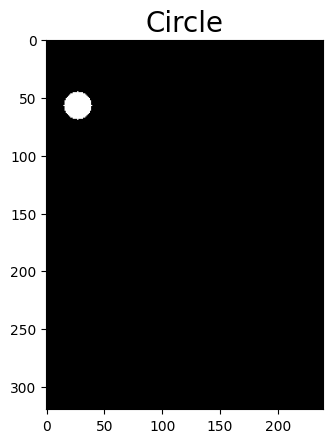

In [ ]:
img_shape = (320, 240, 1)
img, data_shape = create_data_sample(1, img_shape[0], img_shape[1]) # data smaple with 1 shape, height, width
show_sample(img, data_shape)

In [ ]:
# Training model type setup


#l2 = keras.regularizers.l2(1e-5)
l2 = None

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(320, 240, 3)), # img size
    tf.keras.layers.Dense(128, activation='relu'), # first layer of neurons
    tf.keras.layers.Dense(2) # shapes number
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 230400)            0         
                                                                 
 dense (Dense)               (None, 128)               29491328  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 29491586 (112.50 MB)
Trainable params: 29491586 (112.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Generate data sample for teaching model
teachingDataSize = 10000

x_list = []
x_type = []
for i in range(teachingDataSize):
  x, y  = create_data_sample(1, img_shape[0], img_shape[1])
  x_list.append(x)
  x_type.append(y)
x_list = np.array(x_list)
x_type = np.array(x_type)

In [ ]:
i = 0
show_sample(x_list[i], x_type[i])

In [ ]:
x_list.shape

In [ ]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # model compile

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) # check GPU avaible devices

In [ ]:
# train model
model.fit(x_list, x_type, epochs=25)

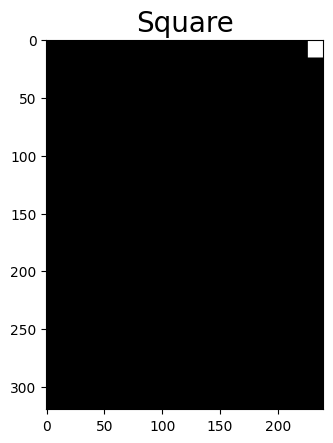

In [ ]:
# for i in range(8):
#   x, y  = create_data_sample(1, 320, 240)
#   test_images = []
#   test_shapes = []
#   test_images.append(x)
#   test_shapes.append(y)
# show_sample(test_images[0], test_shapes[0])

In [ ]:
# Generate data sample for testing model
testingDataSize = 10

x_list_test = []
y_list_test = []
for i in range(testingDataSize):
  x, y  = create_data_sample(1, img_shape[0], img_shape[1])
  x_list_test.append(x)
  y_list_test.append(y)
x_list_test = np.array(x_list_test)
y_list_test = np.array(y_list_test)

1/1 [==============================] - 0s 50ms/step


Success rate:  0.7


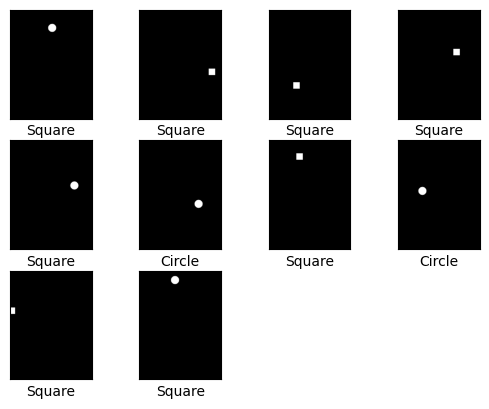

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_list_test)
predicted_labels = []
success_rate = 0
for i in range(testingDataSize):
  if(np.argmax(predictions[i]) == y_list_test[i]):
      success_rate += 1
  predicted_labels.append(np.argmax(predictions[i]))
show_sample_group(x_list_test, predicted_labels, testingDataSize)
print("Success rate: ", success_rate / testingDataSize)

In [ ]:
# loss_function(y_pred, label)

NameError: ignored